# Machine Learning Assignment 2 - Task 1: Neural Networks
# Iris Dataset Classification using TensorFlow/Keras

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(iris.feature_names)}")



Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Number of samples: 150
Number of features: 4


In [3]:
print("First 5 rows:")
df.head()

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 2. EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
# Check for missing values
print(f"Missing values per column:")
print(df.isnull().sum())

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


In [7]:
# Basic statistics
print(f"\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Class distribution
print(f"\nClass distribution:")
class_counts = df['species'].value_counts()
print(class_counts)


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# 3. DATA PREPROCESSING

In [10]:
# Separate features and target
features = iris.feature_names
X = df[features].values
y = df['target'].values
print(f"Original data shape: {X.shape}")
print(f"Target shape: {y.shape}")

Original data shape: (150, 4)
Target shape: (150,)


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling/normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nBefore scaling - Feature ranges:")
for i, feature in enumerate(features):
    print(f"{feature}: [{X_train[:, i].min():.2f}, {X_train[:, i].max():.2f}]")

print(f"\nAfter scaling - Feature ranges:")
for i, feature in enumerate(features):
    print(f"{feature}: [{X_train_scaled[:, i].min():.2f}, {X_train_scaled[:, i].max():.2f}]")


Before scaling - Feature ranges:
sepal length (cm): [4.30, 7.90]
sepal width (cm): [2.00, 4.40]
petal length (cm): [1.10, 6.90]
petal width (cm): [0.10, 2.50]

After scaling - Feature ranges:
sepal length (cm): [-1.84, 2.46]
sepal width (cm): [-2.35, 3.03]
petal length (cm): [-1.52, 1.78]
petal width (cm): [-1.45, 1.71]


In [12]:
y_train

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [13]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, 3)
y_test_cat = keras.utils.to_categorical(y_test, 3)

print(f"\nOne-hot encoded labels shape: {y_train_cat.shape}")
print(f"Sample label before encoding: {y_train[0]} ({iris.target_names[y_train[0]]})")
print(f"Sample label after encoding: {y_train_cat[0]}")


One-hot encoded labels shape: (120, 3)
Sample label before encoding: 0 (setosa)
Sample label after encoding: [1. 0. 0.]


# 4. NEURAL NETWORK MODEL BUILDING

In [15]:
model = keras.Sequential([
    keras.Input(shape=(4,), name='input_layer'),
    layers.Dense(64, activation='relu', name='hidden_layer_1'),
    layers.Dropout(0.3, name='dropout_1'),
    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.3, name='dropout_2'),
    layers.Dense(16, activation='relu', name='hidden_layer_3'),
    layers.Dense(3, activation='softmax', name='output_layer')
])

# Display model architecture
model.summary()

# Compile the model
model.compile(
    optimizer='adam', # automatically adjusts learning rate during training
    loss='categorical_crossentropy',
    metrics=['accuracy'] # tracks accuracy during training
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

# 5. MODEL TRAINING

In [17]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Watches validation loss
    patience=10, # Stops if noimprovements for 10 consecutive epochs
    restore_best_weights=True # Restores weights from best epoch(not last epoch)
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001
)

# Train the model
history = model.fit(
    X_train_scaled, y_train_cat,
    batch_size=16,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2313 - loss: 1.1556 - val_accuracy: 0.3333 - val_loss: 1.0923 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3443 - loss: 1.1028 - val_accuracy: 0.5000 - val_loss: 1.0627 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3743 - loss: 1.0694 - val_accuracy: 0.6667 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4229 - loss: 1.0547 - val_accuracy: 0.6667 - val_loss: 1.0062 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7009 - loss: 0.9929 - val_accuracy: 0.6667 - val_loss: 0.9650 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6991 - loss: 0.9484 - val_accuracy: 0.6667 - val_loss: 0.9079 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7815 - loss: 0.8853 - val_accuracy: 0.6667 

# 6. MODEL EVALUATION

In [51]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report
print(" CLASSIFICATION REPORT ")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Test Loss: 0.1543
Test Accuracy: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 CLASSIFICATION REPORT 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# 7. RESULTS VISUALIZATION

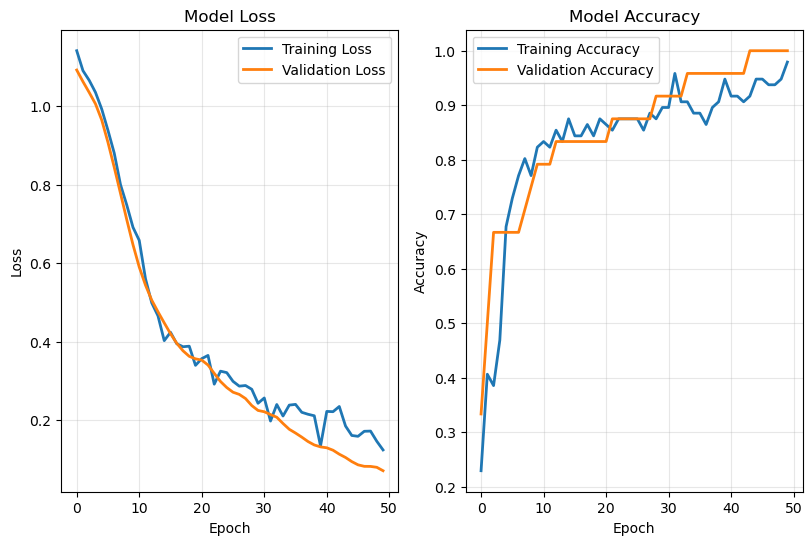

In [21]:
# Plot training history
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 4, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

In [61]:
# Confusion Matrix
plt.subplot(1, 6, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: num must be an integer with 1 <= num <= 2, not 3

<Figure size 640x480 with 0 Axes>

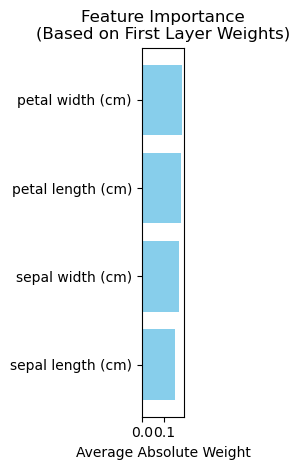

In [23]:
# Feature importance visualization (using model weights)
plt.subplot(1, 4, 4)
weights = model.layers[0].get_weights()[0]  # First layer weights
feature_importance = np.abs(weights).mean(axis=1)
plt.barh(features, feature_importance, color='skyblue')
plt.title('Feature Importance\n(Based on First Layer Weights)')
plt.xlabel('Average Absolute Weight')

plt.tight_layout()
plt.show()

# 8. PREDICTION EXAMPLES

In [25]:
# Show all test predictions
print("Test Set Predictions:")
print("Index | Actual | Predicted | Confidence | Correct")
print("-" * 50)

for i in range(len(X_test)):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[y_pred[i]]
    confidence = y_pred_prob[i][y_pred[i]]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    
    print(f"{i:5d} | {actual:10s} | {predicted:9s} | {confidence:8.3f} | {correct}")

Test Set Predictions:
Index | Actual | Predicted | Confidence | Correct
--------------------------------------------------
    0 | setosa     | setosa    |    1.000 | ✓
    1 | virginica  | virginica |    0.885 | ✓
    2 | versicolor | versicolor |    0.980 | ✓
    3 | versicolor | versicolor |    0.993 | ✓
    4 | setosa     | setosa    |    1.000 | ✓
    5 | versicolor | virginica |    0.521 | ✗
    6 | setosa     | setosa    |    1.000 | ✓
    7 | setosa     | setosa    |    1.000 | ✓
    8 | virginica  | virginica |    0.969 | ✓
    9 | versicolor | versicolor |    0.665 | ✓
   10 | virginica  | virginica |    0.977 | ✓
   11 | virginica  | virginica |    0.990 | ✓
   12 | virginica  | virginica |    0.993 | ✓
   13 | versicolor | versicolor |    0.691 | ✓
   14 | setosa     | setosa    |    1.000 | ✓
   15 | setosa     | setosa    |    1.000 | ✓
   16 | setosa     | setosa    |    1.000 | ✓
   17 | versicolor | versicolor |    0.986 | ✓
   18 | versicolor | versicolor |    0.747 |

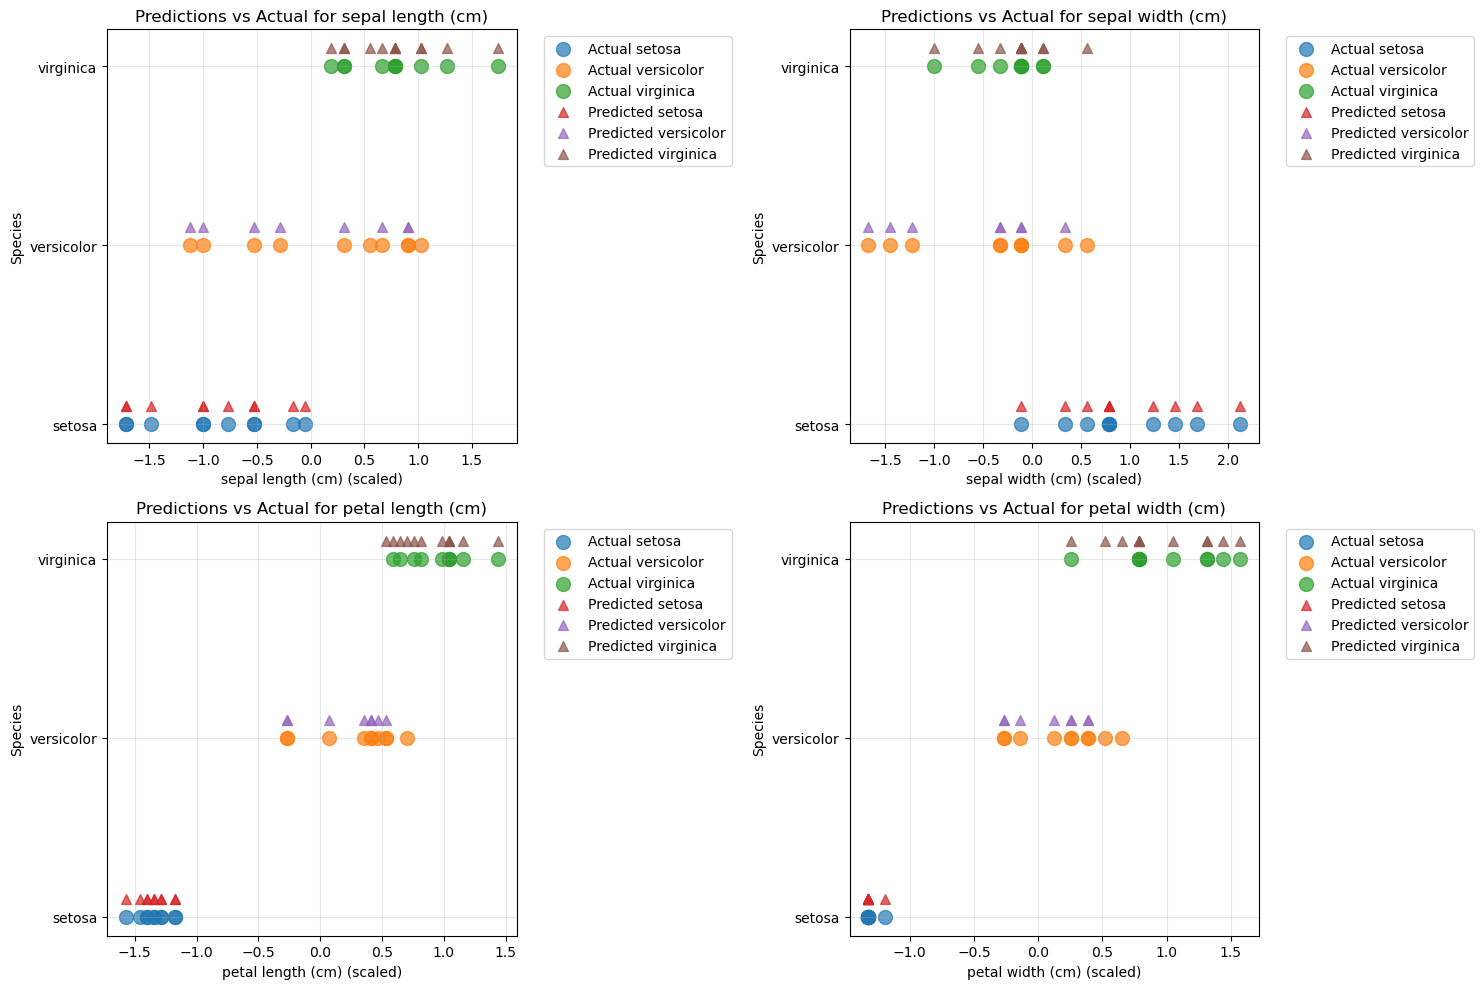

In [26]:
# Visualize predictions vs actual
plt.figure(figsize=(15, 10))

# Create a comprehensive prediction visualization
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    
    # Plot actual classes
    for j, species in enumerate(iris.target_names):
        mask = y_test == j
        plt.scatter(X_test_scaled[mask, i], [j] * sum(mask), 
                   alpha=0.7, s=100, label=f'Actual {species}', marker='o')
    
    # Plot predicted classes
    for j, species in enumerate(iris.target_names):
        mask = y_pred == j
        plt.scatter(X_test_scaled[mask, i], [j + 0.1] * sum(mask), 
                   alpha=0.7, s=50, label=f'Predicted {species}', marker='^')
    
    plt.xlabel(f'{feature} (scaled)')
    plt.ylabel('Species')
    plt.title(f'Predictions vs Actual for {feature}')
    plt.yticks([0, 1, 2], iris.target_names)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. MODEL PERFORMANCE SUMMARY

In [28]:
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Total trainable parameters: {model.count_params():,}")

# Per-class accuracy
print(f"\nPer-class performance:")
for i, species in enumerate(iris.target_names):
    class_mask = (y_test == i)
    if sum(class_mask) > 0:
        class_acc = np.mean(y_pred[class_mask] == y_test[class_mask])
        print(f"{species}: {class_acc:.4f} ({class_acc*100:.1f}%)")

# Model complexity analysis
print(f"\nModel complexity:")
print(f"- Number of layers: {len(model.layers)}")
print(f"- Hidden layers: {len(model.layers) - 1}")
print(f"- Total parameters: {model.count_params()}")

# Training efficiency
print(f"\nTraining efficiency:")
print(f"- Epochs trained: {len(history.history['loss'])}")
print(f"- Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"- Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Test Accuracy: 0.9333 (93.33%)
Final Test Loss: 0.1543
Total trainable parameters: 2,979

Per-class performance:
setosa: 1.0000 (100.0%)
versicolor: 0.8000 (80.0%)
virginica: 1.0000 (100.0%)

Model complexity:
- Number of layers: 6
- Hidden layers: 5
- Total parameters: 2979

Training efficiency:
- Epochs trained: 50
- Final training accuracy: 0.9792
- Final validation accuracy: 1.0000
